In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import backend as K
K.clear_session()

train_datagen=ImageDataGenerator(
    rescale=1./255,
    width_shift_range=0.1,
    height_shift_range=0.1,
    rotation_range=15,
    horizontal_flip=True,
    zoom_range=0.1,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

In [3]:
train_generator=train_datagen.flow_from_directory(
    'BrainTumor/Training',
    target_size=(64, 64),
    batch_size=8,
    class_mode='binary'
)

Found 1222 images belonging to 2 classes.


In [4]:
validation_generator=val_datagen.flow_from_directory(
    'BrainTumor/Testing',
    target_size=(64, 64),
    batch_size=8,
    class_mode='binary',
    shuffle=False
)

Found 179 images belonging to 2 classes.


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

num_classes = train_generator.num_classes

model = Sequential([
    Conv2D(16, (3,3), activation='relu', input_shape=(64,64,3)),
    MaxPooling2D((2,2)),
    Dropout(0.25),  

    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Dropout(0.50), 

    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])


In [6]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision, Recall
model.compile(
    optimizer=Adam(learning_rate=0.0001),  # hyperparameter
    loss='binary_crossentropy',
    metrics=['accuracy', Precision(), Recall(), 'AUC']
)

In [9]:
#Train the model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=15
)

Epoch 1/15
153/153 [==============================] - 17s 113ms/step - loss: 0.3194 - accuracy: 0.8797 - precision: 0.8688 - recall: 0.9686 - auc: 0.9124 - val_loss: 0.6349 - val_accuracy: 0.6704 - val_precision: 0.5773 - val_recall: 0.7568 - val_auc: 0.7512
Epoch 2/15
153/153 [==============================] - 17s 114ms/step - loss: 0.2926 - accuracy: 0.8879 - precision: 0.8800 - recall: 0.9661 - auc: 0.9325 - val_loss: 0.6252 - val_accuracy: 0.6369 - val_precision: 0.5584 - val_recall: 0.5811 - val_auc: 0.7455
Epoch 3/15
153/153 [==============================] - 17s 114ms/step - loss: 0.2917 - accuracy: 0.8920 - precision: 0.8831 - recall: 0.9686 - auc: 0.9262 - val_loss: 0.6474 - val_accuracy: 0.6648 - val_precision: 0.6061 - val_recall: 0.5405 - val_auc: 0.7442
Epoch 4/15
153/153 [==============================] - 18s 115ms/step - loss: 0.2835 - accuracy: 0.8863 - precision: 0.8848 - recall: 0.9565 - auc: 0.9347 - val_loss: 0.6079 - val_accuracy: 0.6648 - val_precision: 0.5972 - v

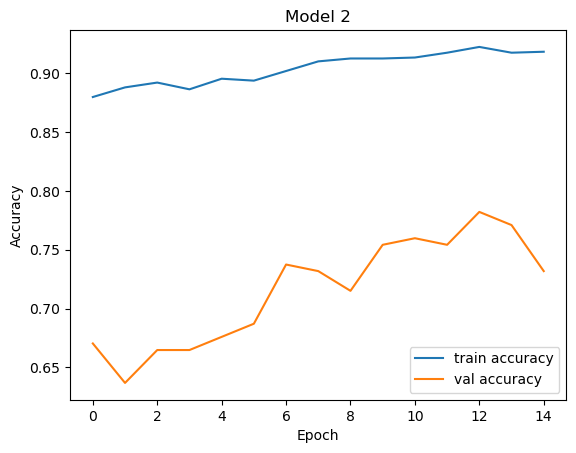

In [16]:
# Plotting Validation Curve
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model 2')
plt.show()

In [17]:
y_prob = model.predict(validation_generator) # Get predicted outputs
y_prob = y_prob.ravel()

23/23 [==============================] - 2s 68ms/step


In [18]:
y_true = validation_generator.classes #Get classes for predicted output

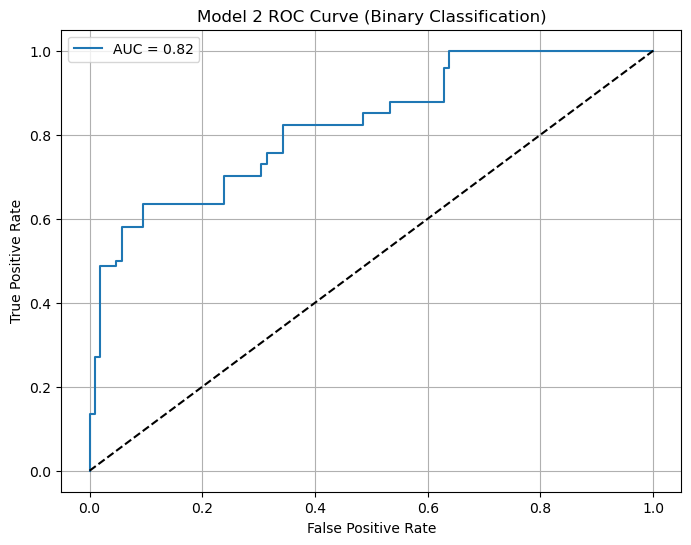

In [19]:
#Plotting AUC Curve
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_true, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0,1], [0,1], 'k--')  # random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Model 2 ROC Curve (Binary Classification)')
plt.legend()
plt.grid(True)
plt.show()


